In [ ]:
# 模型保存与加载
import joblib
file = r'D:\CDA\敏捷算法建模训练\敏捷-1\统计建模\2_逻辑回归案例\model_logit1114.joblib'
joblib.dump(model,file)   # 保存模型
DT_model = joblib.load(r"D:\CDA\敏捷算法建模训练\敏捷-1\统计建模\2_逻辑回归案例\model_logit1114.joblib")   # 读取模型

DT_model.predict(test.iloc[:,:-1])   # 直接用读取的模型做预测

In [46]:
(model.predict(test.iloc[:,:-1])>0.15).astype('int')

739     1
9426    0
8200    0
5880    0
9114    0
       ..
5367    0
2197    1
2520    1
3159    0
9908    0
Length: 3000, dtype: int32

In [45]:
#最优阈值（约登指数）
th[(tpr - fpr).argmax()]

0.15133468729857574

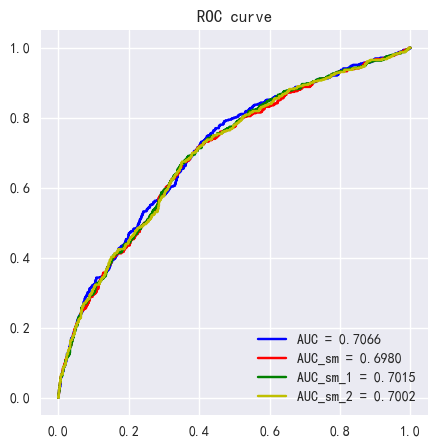

In [44]:
#绘图
plt.figure(figsize=[5, 5])
plt.plot(fpr, tpr, 'b', label='AUC = %.4f' %metrics.auc(fpr, tpr))
plt.plot(fpr_sm, tpr_sm, 'r', label='AUC_sm = %.4f' %metrics.auc(fpr_sm, tpr_sm))
plt.plot(fpr_sm_1, tpr_sm_1, 'g', label='AUC_sm_1 = %.4f' %metrics.auc(fpr_sm_1, tpr_sm_1))
plt.plot(fpr_sm_2, tpr_sm_2, 'y', label='AUC_sm_2 = %.4f' %metrics.auc(fpr_sm_2, tpr_sm_2))


plt.legend(loc = 'lower right')
plt.title('ROC curve')
plt.show();

In [43]:
# 模型评估
from sklearn import metrics
#将真实的标签值与预测出来的为1的概率值传入metrics.roc_curve（），返回的是一系列的tpr、fpr、阈值的取值情况
fpr, tpr, th = metrics.roc_curve(test.iloc[:,-1], pre)
fpr_sm, tpr_sm, th_sm = metrics.roc_curve(test.iloc[:,-1], pre_sm)
fpr_sm_1, tpr_sm_1, th_sm_1 = metrics.roc_curve(test.iloc[:,-1], pre_sm_1)
fpr_sm_2, tpr_sm_2, th_sm_2 = metrics.roc_curve(test.iloc[:,-1], pre_sm_2)
#假阳性率 fpr #真阳性率 tpr ; #阈值 th

In [42]:
smote_b2 = BorderlineSMOTE(random_state=123, kind='borderline-2')
Xtrain_sm_2,Ytrain_sm_2 = smote_b2.fit_resample(train.iloc[:,:-1],train.iloc[:,-1])
train_sm_2 = pd.concat([Xtrain_sm_2, Ytrain_sm_2],axis=1)
formula='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model_sm_2 = smf.logit(formula=formula, data=train_sm_2).fit()
pre_label_sm_2= (model_sm_2.predict(test.iloc[:,:-1]) > 0.5).astype("int")   # 生成预测值
print(classification_report(test.iloc[:,-1], pre_label_sm_2))   # Y的真实值，Y的预测值
pre_sm_2 = model_sm_2.predict(test.iloc[:,:-1])

Optimization terminated successfully.
         Current function value: 0.630928
         Iterations 6
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      2508
           1       0.27      0.68      0.38       492

    accuracy                           0.64      3000
   macro avg       0.59      0.66      0.56      3000
weighted avg       0.80      0.64      0.69      3000



In [41]:
# smote改进 把样本分三类： 1.安全类A 2.危险类B 3.异常类C 只对危险类进行生成（再分smote1和smote2)
# smote1: B仍是采用原始方法生成样本，仍是找K个最近的少数类样本
# smote2: 生成新样本的时候，不再区分少数和多数类样本
from imblearn.over_sampling import BorderlineSMOTE
smote_b1 = BorderlineSMOTE(random_state=123)
Xtrain_sm_1,Ytrain_sm_1 = smote_b1.fit_resample(train.iloc[:,:-1],train.iloc[:,-1])
train_sm_1 = pd.concat([Xtrain_sm_1, Ytrain_sm_1],axis=1)
formula='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model_sm_1 = smf.logit(formula=formula, data=train_sm_1).fit()
pre_label_sm_1= (model_sm_1.predict(test.iloc[:,:-1]) > 0.5).astype("int")   # 生成预测值
print(classification_report(test.iloc[:,-1], pre_label_sm_1))   # Y的真实值，Y的预测值
pre_sm_1 = model_sm_1.predict(test.iloc[:,:-1])

Optimization terminated successfully.
         Current function value: 0.621254
         Iterations 6
              precision    recall  f1-score   support

           0       0.91      0.63      0.75      2508
           1       0.27      0.69      0.39       492

    accuracy                           0.64      3000
   macro avg       0.59      0.66      0.57      3000
weighted avg       0.81      0.64      0.69      3000



In [35]:
#混淆矩阵，默认阈值0.5
model_sm.pred_table()

array([[3603., 2212.],
       [1839., 3976.]])

In [40]:
pre_label_sm= (model_sm.predict(test.iloc[:,:-1]) > 0.5).astype("int")   # 生成预测值
print(classification_report(test.iloc[:,-1], pre_label_sm))   # Y的真实值，Y的预测值
# 0：多数类样本的召回率；1： 少数类样本的召回率 ；acc: 准确率
#输出预测概率
pre_sm = model_sm.predict(test.iloc[:,:-1])

              precision    recall  f1-score   support

           0       0.91      0.64      0.75      2508
           1       0.27      0.67      0.38       492

    accuracy                           0.64      3000
   macro avg       0.59      0.66      0.57      3000
weighted avg       0.80      0.64      0.69      3000



In [33]:
#重新拟合模型
formula='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model_sm = smf.logit(formula=formula, data=train_sm)   #实例化
model_sm = model_sm.fit()   #拟合数据
model_sm.summary()

Optimization terminated successfully.
         Current function value: 0.628656
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   是否成交   No. Observations:                11630
Model:                          Logit   Df Residuals:                    11622
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Mar 2023   Pseudo R-squ.:                 0.09304
Time:                        20:56:19   Log-Likelihood:                -7311.3
converged:                       True   LL-Null:                       -8061.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2345      0.046      5.104      0.000       0.144       0.325
对话数量          -0.1712      0.018     -9.515      0.000      -0.206      -0.136
对话时长          -0.0020      0.000     -4.224      0.000      -0.003      -0.001
互动次数           0.0625      0.007      8.463      0.000       0.048       0.077
销售说话时长占比      -0.0200      0.001    -27.726      0.000      -0.021      -0.019
销售最长讲述         0.0073      0.002      3.647      0.000       0.003       0.011
客户最长讲述         0.0073      0.004      1.684      0.092      -0.001       0.016
对话得分           0.1273      0.011     11.411      0.000       0.105       0.149
==============================================================================
"""

In [ ]:
# BorderlineSMOTE
from imblearn.over_sampling import BorderlineSMOTE

In [32]:
#合并过采样后的自变量与因变量
train_sm = pd.concat([Xtrain_sm, Ytrain_sm], axis=1)

In [31]:
# SMOTE过采样:对训练集进行过采  ，易受离群值影响，模型更加不准确（多数与少数样本边界不断模糊）
from imblearn.over_sampling import SMOTE
#过采样（SMOTE）原始smote
smote = SMOTE(random_state=42)   #实例化
Xtrain_sm,  Ytrain_sm= smote.fit_resample(train.iloc[:,:-1], train.iloc[:,-1])   #过采样
Ytrain_sm.value_counts()

0    5815
1    5815
Name: 是否成交, dtype: int64

In [30]:
# 过采样
train['是否成交'].value_counts() # 0,1比率推敲

0    5815
1    1185
Name: 是否成交, dtype: int64

In [29]:
#输出分类报告，Y的真实值，Y的预测标签
print(classification_report(test.iloc[:,-1], pre_label))
# precision 精确率；recall 召回率 ；f1-score 相当于精确率与召回率的平均

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2508
           1       0.56      0.05      0.09       492

    accuracy                           0.84      3000
   macro avg       0.70      0.52      0.50      3000
weighted avg       0.80      0.84      0.78      3000



In [28]:
#输出预测概率
pre = model.predict(test.iloc[:,:-1])
#预测标签（默认阈值0.5）
# 生成预测标签
pre_label = (pre>0.5).astype('int')
pre_label

739     0
9426    0
8200    0
5880    0
9114    0
       ..
5367    0
2197    0
2520    0
3159    0
9908    0
Length: 3000, dtype: int32

In [25]:
#拟合模型
formula='是否成交~对话数量+对话时长+互动次数+销售说话时长占比+销售最长讲述+客户最长讲述+对话得分'
model = smf.logit(formula=formula, data=train)   #实例化
model = model.fit()   #拟合数据
model.summary()   #输出结果LLR-P值为： 拟合优度检验的结果

Optimization terminated successfully.
         Current function value: 0.421544
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   是否成交   No. Observations:                 7000
Model:                          Logit   Df Residuals:                     6992
Method:                           MLE   Df Model:                            7
Date:                Fri, 17 Mar 2023   Pseudo R-squ.:                 0.07302
Time:                        20:18:23   Log-Likelihood:                -2950.8
converged:                       True   LL-Null:                       -3183.3
Covariance Type:            nonrobust   LLR p-value:                 2.788e-96
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4818      0.068    -21.679      0.000      -1.616      -1.348
对话数量          -0.0143      0.024     -0.594      0.553      -0.062       0.033
对话时长          -0.0011      0.001     -1.829      0.067      -0.002    7.94e-05
互动次数           0.0395      0.009      4.252      0.000       0.021       0.058
销售说话时长占比      -0.0187      0.001    -15.398      0.000      -0.021      -0.016
销售最长讲述         0.0044      0.003      1.760      0.078      -0.001       0.009
客户最长讲述         0.0125      0.006      2.162      0.031       0.001       0.024
对话得分           0.0978      0.013      7.403      0.000       0.072       0.124
==============================================================================
"""

In [24]:
#划分数据集
train, test= train_test_split(data, test_size= 0.3,random_state= 6)

In [23]:
# 去掉变量ID
data.drop('ID', axis=1, inplace=True)

In [22]:
# 逻辑回归模型建议
# 分割测试集训练集
from sklearn.model_selection import train_test_split
# 模型评估（召回率），选择0.5为阈值
from sklearn.metrics import classification_report # 用于分类报告

In [ ]:
# 饼图
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

v = label
c = Pie()
c.add(
    "",
    [list(z) for z in zip(v, value_1)],
    radius=["30%", "75%"],
    center=["25%", "50%"],
    rosetype="radius",
    label_opts=opts.LabelOpts(is_show=False),
)
c.add(
    "",
    [list(z) for z in zip(v, value_1)],
    radius=["30%", "75%"],
    center=["75%", "50%"],
    rosetype="area",
)
c.set_global_opts(title_opts=opts.TitleOpts(title="Pie-玫瑰图示例"))
c.render_notebook()
# c.render("pie_rosetype.html")

In [49]:
# 线图
# import pyecharts.options as opts
# from pyecharts.charts import Line
# # from pyecharts.faker import Faker
#
# value_1 = data['互动次数'].iloc[:10]
# c = Line()
# c.add_xaxis(label)
# c.add_yaxis("对话时长", value)
# c.add_yaxis("互动次数", value_1)
# c.set_global_opts(title_opts=opts.TitleOpts(title="Line"))
# c.render_notebook()
# c.render("line_base.html")

In [48]:
# 涟漪散点图
# from pyecharts import options as opts
# from pyecharts.charts import EffectScatter
# from pyecharts.faker import Faker
#
# label = data['ID'].iloc[:10]
# value = data['对话时长'].iloc[:10]
# c = EffectScatter()
# c.add_xaxis(label)
# c.add_yaxis("", value)
# c.set_global_opts(title_opts=opts.TitleOpts(title="EffectScatter"))
# c.render_notebook()
# c.render("effectscatter_base.html")

In [17]:
data.head()

,ID,对话数量,对话时长,互动次数,销售说话时长占比,销售最长讲述,客户最长讲述,对话得分,是否成交
0,6,1,31.820,4.0,69.0,16.08,5.09,1.0,0
1,8,1,44.450,5.0,67.0,15.37,14.25,1.0,0
2,9,1,62.290,6.0,1.0,28.44,6.89,1.0,0
3,28,1,59.930,6.0,76.0,29.17,6.80,1.0,0
4,75,10,72.257,7.2,23.3,44.70,5.79,1.9,1


In [ ]:
# 拓展 Pyecharts
# pip install pyecharts -i https://pypi.tuna.tsinghua.edu.cn/simple
from pyecharts import options as opts
from pyecharts.charts import Scatter
from pyecharts.commons.utils import JsCode
from pyecharts.faker import Faker

c = Scatter()
c.add_xaxis(Faker.choose())
c.add_yaxis(
    "商家A",
    [list(z) for z in zip(Faker.values(), Faker.choose())],
    label_opts=opts.LabelOpts(
        formatter=JsCode(
            "function(params){return params.value[1] +' : '+ params.value[2];}"
        )
    ),
)
c.set_global_opts(
    title_opts=opts.TitleOpts(title="Scatter-多维度数据"),
    tooltip_opts=opts.TooltipOpts(
        formatter=JsCode(
            "function (params) {return params.name + ' : ' + params.value[2];}"
        )
    ),
    visualmap_opts=opts.VisualMapOpts(
        type_="color", max_=150, min_=20, dimension=1
    ),
)
c.render_notebook()
# c.render("scatter_multi_dimension11140210.html")
Faker.choose()
Faker.values()

In [ ]:
# 直方图
sns.countplot("是否成交", data=data,palette='RdYlGn_r')

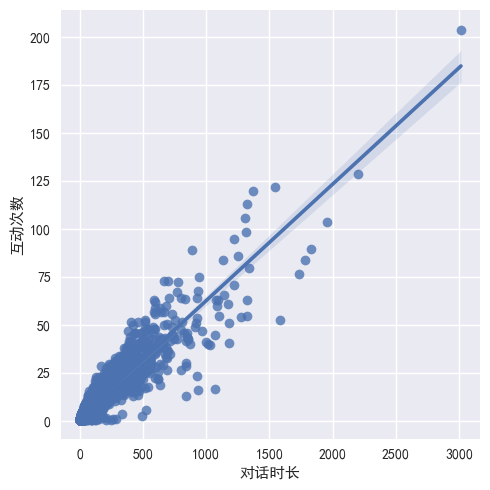

In [14]:
# 回归图
sns.lmplot(x="对话时长", y="互动次数", data=data)
# sns.lmplot(x="对话时长", y="互动次数", data=data, hue='是否成交')

In [ ]:
# 箱线图
sns.boxplot(data=data['对话时长'])
sns.boxplot(x="是否成交", y="对话时长", data=data)

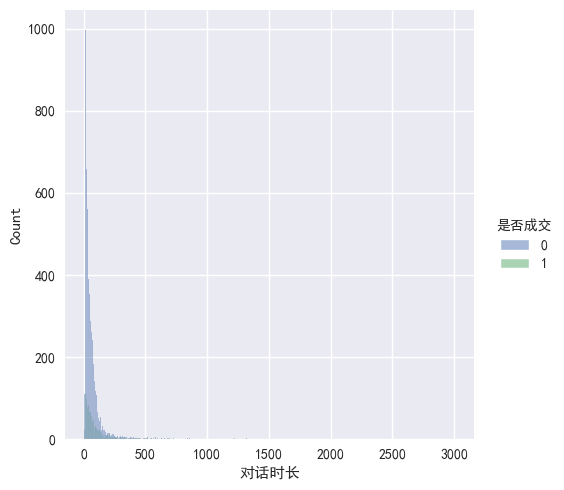

In [13]:
# 散点图
# sns.scatterplot(data=data, x="对话时长", y="互动次数")
# 分布图
sns.displot(data = data,x="对话时长", hue='是否成交')

In [ ]:
#不同类别下，两两变量之间的关系
# reg 表示在非对角线上展示
sns.pairplot(data, kind="reg",diag_kind="kde");

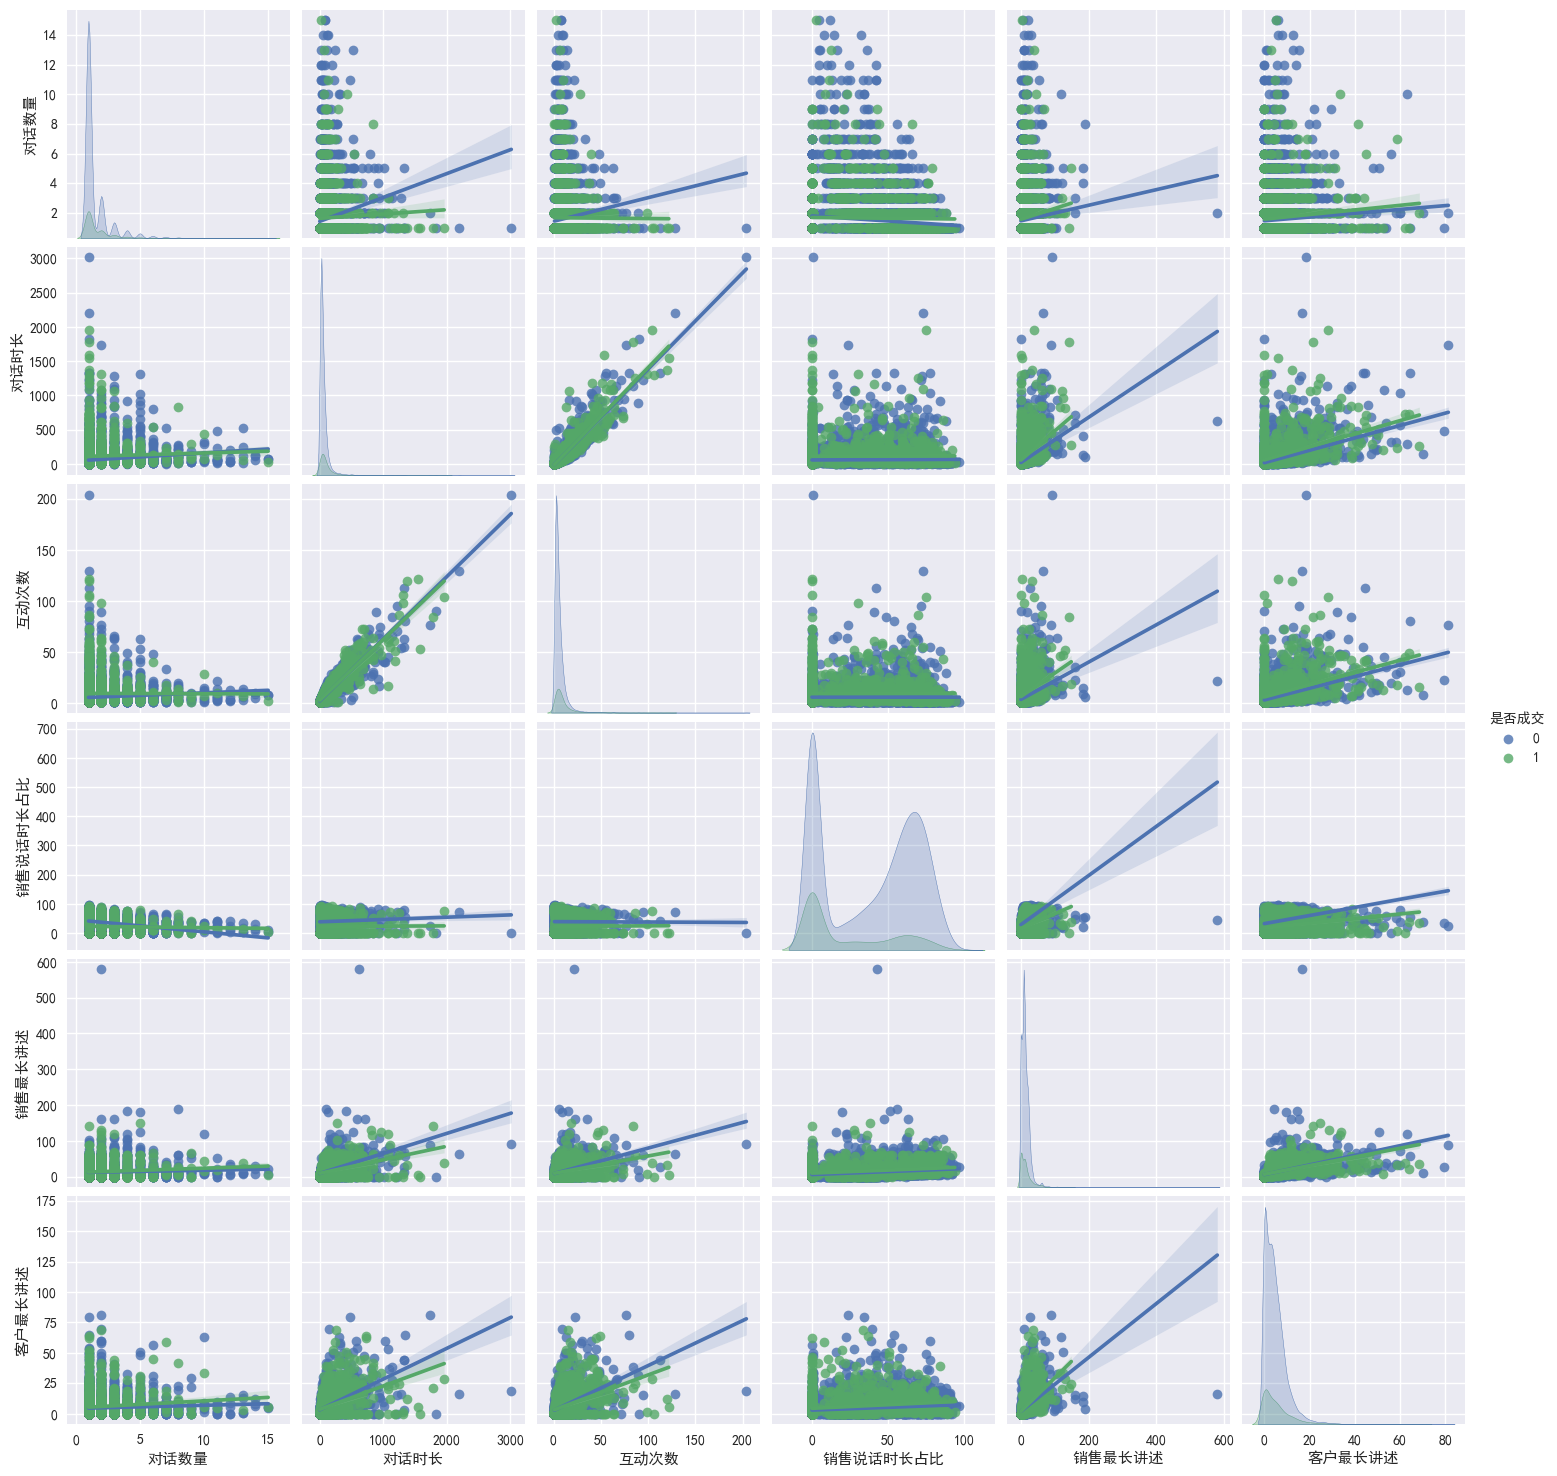

In [12]:
#不同类别下，两两变量之间的关系
sns.pairplot(data[['对话数量', '对话时长', '互动次数', '销售说话时长占比', '销售最长讲述', '客户最长讲述','是否成交']], kind="reg",diag_kind="kde", hue='是否成交');

,ID,对话数量,对话时长,互动次数,销售说话时长占比,销售最长讲述,客户最长讲述,对话得分,是否成交
ID,1.000000,-0.035017,-0.052924,-0.084511,0.210827,0.039382,-0.004909,-0.060768,-0.209066
对话数量,-0.035017,1.000000,0.114307,0.069732,-0.148225,0.066501,0.067730,0.149951,0.040856
对话时长,-0.052924,0.114307,1.000000,0.925891,-0.010369,0.416713,0.463678,0.424580,0.160212
互动次数,-0.084511,0.069732,0.925891,1.000000,-0.033356,0.350818,0.447918,0.397499,0.170271
销售说话时长占比,0.210827,-0.148225,-0.010369,-0.033356,1.000000,0.345732,0.223492,0.004389,-0.193394
销售最长讲述,0.039382,0.066501,0.416713,0.350818,0.345732,1.000000,0.552494,0.254461,0.033712
客户最长讲述,-0.004909,0.067730,0.463678,0.447918,0.223492,0.552494,1.000000,0.240484,0.062235
对话得分,-0.060768,0.149951,0.424580,0.397499,0.004389,0.254461,0.240484,1.000000,0.144542
是否成交,-0.209066,0.040856,0.160212,0.170271,-0.193394,0.033712,0.062235,0.144542,1.000000


<AxesSubplot: >

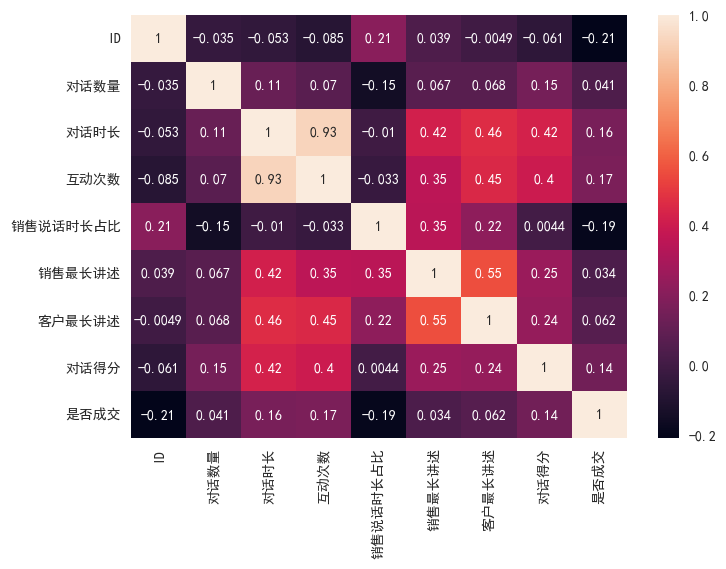

In [11]:
# 相关分析
import seaborn as sns
data.corr()
#热力图
sns.heatmap(data.corr(), annot=True)

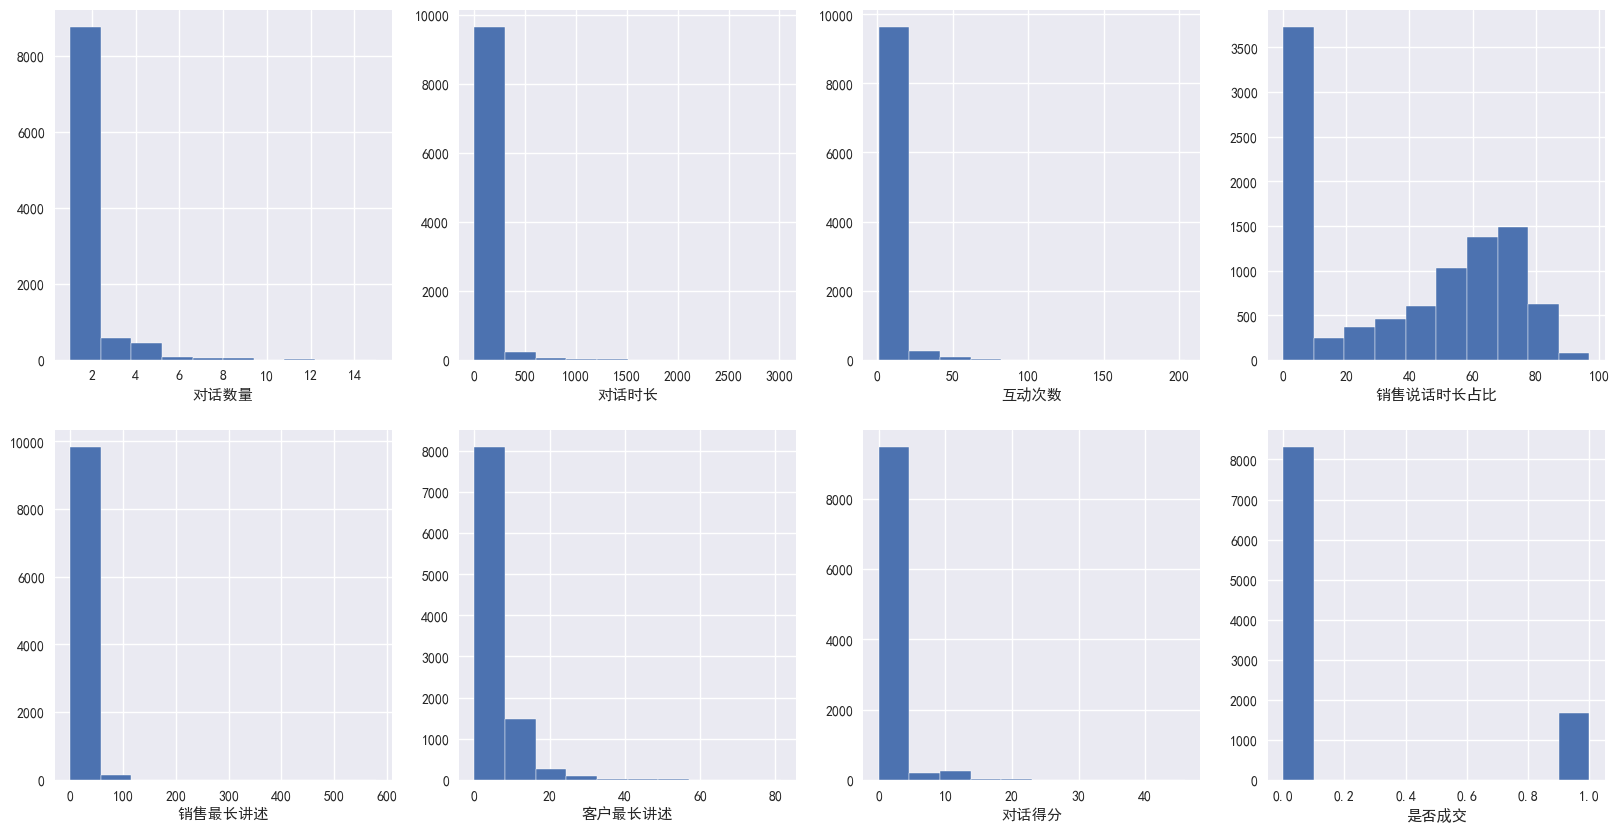

In [9]:
plt.figure(facecolor='white', figsize=(20,10))
plt.subplot(241)
plt.hist(data['对话数量'])
plt.xlabel('对话数量')

plt.subplot(242)
plt.hist(data['对话时长'])
plt.xlabel('对话时长')

plt.subplot(243)
plt.hist(data['互动次数'])
plt.xlabel('互动次数')

plt.subplot(244)
plt.hist(data['销售说话时长占比'])
plt.xlabel('销售说话时长占比')

plt.subplot(245)
plt.hist(data['销售最长讲述'])
plt.xlabel('销售最长讲述')

plt.subplot(246)
plt.hist(data['客户最长讲述'])
plt.xlabel('客户最长讲述')

plt.subplot(247)
plt.hist(data['对话得分'])
plt.xlabel('对话得分')

plt.subplot(248)
plt.hist(data['是否成交'])
plt.xlabel('是否成交');

In [ ]:
data.duplicated().mean()
#删除重复值
data.drop_duplicates(inplace=True)

In [8]:
#‘成交意向度’为系统输出，这里不需要
data.drop('成交意向度', axis=1, inplace=True)
data.rename(columns={'客户ID':'ID', '对话时长(总时长/对话数量)':'对话时长', '互动次数(总次数/对话数量)':'互动次数',
                     '是否已成交(1已成交0未成交)':'是否成交'}, inplace=True)

In [7]:
data = pd.read_excel('./2_逻辑回归案例/客户列表.xls')

In [5]:
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
#设置字体为黑色
plt.rcParams['font.family']='SimHei'
#显示符号
plt.rcParams['axes.unicode_minus']= False

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import os
os.chdir('C:\Data\Jupyter_file\统计建模')